# Estadística Descriptiva


- Librería básica: scipy.stats (importado como `stats`)

- `SciPy` es una biblioteca de computación científica que utiliza `NumPy` como base.

- SciPy significa *Scientific Python*.

- Proporciona más funciones de utilidad para optimización, álgebra lineal, funciones especiales, procesamiento de señales, entre otras.

- Al igual que `NumPy`, `SciPy` es de código abierto, por lo que podemos usarlo libremente.

- `SciPy` fue creado por el creador de `NumPy`, [Travis Olliphant](https://es.wikipedia.org/wiki/Travis_Oliphant).




## Medidas de resumen

### Medidas de tendencial central

Creamos 100 números aleatorios con distribución normal:

In [1]:
import numpy as np
N = 100
np.random.seed(85) # genera una semilla para los números aleatorios
x = np.random.normal(loc = 0, scale = 1, size = N)

#### Promedio

> Promedio o media: notado como $\bar{x}$, de un conjunto de $n$ datos $x_1,x_2,\ldots,x_n$ es igual a la suma de valores dividido para $n$.

$$
\bar{x} = \frac{x_1+x_2+\ldots+x_n}{n}=\frac{\sum_{i=1}^nx_i}{n}
$$

-   Si las observaciones están agrupadas en una tabla de frecuencia de datos individuales de $k$ valores, el promedio se calcula

$$
\bar{x} =\frac{\sum_{i=1}^kn_ix_i}{n}
$$
donde $n = {\sum_{i=1}^kn_i}$.


-   Si las observaciones están agrupadas en una tabla de frecuencias agrupadas por clases, se calcula el punto promedio de cada clase $x_i = \frac{l_i+s_i}{2}$ ($i = 1,2,\ldots,k$), donde $l_i$ y $s_i$ son la cota inferior y superor de cada clase respectivamente. El promedio es

$$
\bar{x} =\frac{\sum_{i=1}^kn_ix_i}{n}
$$

### Media como solución a un problema de optimización


**Fórmula:**

Para un conjunto de datos $ x_1, x_2, ..., x_n $, la media es:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

**Interpretación geométrica:**

La media aritmética es el valor $ a \in \mathbb{R} $ que **minimiza la suma de los cuadrados de las distancias** entre sí y cada punto del conjunto de datos:

$$
\bar{x} = \arg \min_{a \in \mathbb{R}} \sum_{i=1}^{n} (x_i - a)^2
$$

**Geometría:**
- Es el centro de gravedad de los puntos.
- En una línea numérica, si cada dato es un peso igual, la media es el punto donde se equilibra la barra.
- Muy sensible a valores extremos (outliers), ya que eleva las diferencias al cuadrado.


**Ventajas:**

- Fácil de calcular y ampliamente comprendido, lo que lo convierte en una herramienta común en el análisis estadístico.
- Utiliza toda la información disponible en el conjunto de datos, ya que considera todos los valores para su cálculo.
- Es útil para comparaciones entre diferentes grupos o poblaciones, especialmente cuando los datos están normalmente distribuidos.
- Es la base para muchos métodos estadísticos y pruebas inferenciales (como la t de Student o ANOVA).

**Desventajas:**

- Es muy sensible a valores atípicos o extremos, lo que puede distorsionar su representatividad del conjunto de datos.
- No siempre refleja adecuadamente la tendencia central en distribuciones sesgadas o asimétricas.
- No es apropiada para variables cualitativas o categóricas, ya que requiere datos numéricos.
- Puede no tener un significado práctico si los datos no son homogéneos o si existen grandes disparidades entre los valores.

In [2]:
np.mean(x)

-0.07448679690601528

Toma en cuenta lo que pasa con valores `nan`. `hstack` agrega valores al vector:

In [3]:
x1 = np.hstack((x,np.nan))

In [4]:
np.mean(x1)

nan

In [5]:
np.nanmean(x1)

-0.07448679690601528

In [6]:
np.nanstd(x1)

1.0336795016636526

In [7]:
np.nanvar(x1)

1.0684933121596172

In [8]:
np.median(x)

-0.15334269473584183

#### Mediana

> La mediana de un conjunto de datos $x_1+x_2+\ldots+x_n$ es el valor que se encuentra en el punto medio, cuando se ordenan los valores de menor a mayor.

Se nota como $Q_2$ o *Med* y tiene la propiedad de que a cada lado se encuentra el 50% de los datos.

### Mediana como solución a un problema de optimización

**Fórmula:**
- Para un número impar de datos ordenados: es el valor central.
- Para un número par de datos ordenados: es el promedio de los dos centrales.

**Interpretación geométrica:**

La mediana es el valor $ a \in \mathbb{R} $ que **minimiza la suma de las distancias absolutas** entre sí y cada punto del conjunto:

$$
\text{med} = \arg \min_{a \in \mathbb{R}} \sum_{i=1}^{n} |x_i - a|
$$

**Geometría:**
- Es el punto medio en términos de cantidad de datos (no de valores).
- Minimiza la distancia total recorrida si tuvieras que visitar todos los puntos desde un solo lugar.
- Mucho más robusta ante valores atípicos, porque no penaliza diferencias grandes como lo hace el cuadrado.


## Comparación matemática y geométrica

| Concepto                  | Media ($ \bar{x} $)                  | Mediana                        |
|---------------------------|----------------------------------------|--------------------------------|
| Minimiza                  | $ \sum (x_i - a)^2 $                 | $ \sum |x_i - a| $           |
| Solución                  | Única, cerrada                         | Generalmente no cerrada       |
| Geometría                 | Centro de masa                         | Punto de mínima distancia     |
| Sensibilidad a outliers  | Alta                                   | Baja                          |


Ventajas:

-   No se ve afectada por valores extremos o atípicos

- Fácil de interpretar, divide los datos en dos mitades.

- En distribuciones asimétricas, la mediana proporciona una mejor representación del centro que la media, ya que no se ve arrastrada hacia la cola de la distribución.

Desventajas:

- La mediana es menos sensible a los cambios en los valores de los datos individuales en comparación con la media.

- A diferencia de la media, la mediana no toma en cuenta todos los valores del conjunto de datos, sino solo el valor central. 

In [9]:
np.median(x)

-0.15334269473584183

#### La moda

> Es el valor que más se repite en un conjunto de datos.

Ventajas:

-   Fácil de entender y calcular, especialmente en conjuntos de datos pequeños o cuando se analizan datos categóricos.

- Única medida de tendencia central que puede aplicarse a datos cualitativos o categóricos, como colores, marcas o tipos

- La moda no se ve influenciada por valores atípicos o extremos.

Desventajas:

- Puede haber más de una moda (multimodal), lo que complica la interpretación.

- La moda no siempre representa bien el centro de la distribución, especialmente en distribuciones con una moda que es significativamente diferente de la media o la mediana.

- Para datos continuos, la moda es menos útil, ya que cada valor puede ser único o tener una baja frecuencia, dificultando la identificación de una moda clara.

In [10]:
from scipy import stats

In [11]:
data = [5,3,7,7,9,7]

In [12]:
stats.mode(data)

ModeResult(mode=7, count=3)

Cuando tenemos resultados en varios elementos como el anterior `(mode=7, count=3)`, podemos guardarlos de la siguiente manera:

In [13]:
(valor, freq) = stats.mode(data)
(valor, freq)

(7, 3)

### Medidas de Dispersión

#### Rango

> Diferencia entre el valor más alto y el valor más bajo


Ventajas:

- Fácil de calcular y comprender.

- Proporciona una idea rápida de la amplitud de los datos, lo que puede ser útil para comparar la variabilidad entre diferentes conjuntos de datos.

Desventajas:

- El rango se ve afectado por los valores atípicos, ya que depende únicamente de los valores máximo y mínimo. Un solo valor extremo puede distorsionar significativamente el rango.

- Dos conjuntos de datos con el mismo rango pueden tener distribuciones internas muy diferentes.


En Python se usa la función `np.ptp` donde `ptp` significa `peak to peak`


In [14]:
range = np.ptp(x)

In [15]:
range

4.142508144337905

#### Desviación estándar

Fue introducida por Karl Person en 1894 y se define:

> La desviación estándar (o desviación típica), notada por $s$, de un conjunto de $n$ mediciones $x_1+x_2+\ldots+x_n$ es la raíz cuadrada de las desviaciones de las mediciones, respecto al promedio $\bar{x}$, dividida entre $n-1$; es decir 

$$
s  = \sqrt{\frac{1}{n-1}\sum_{i = 1}^{n}(x_i-\bar{x})^2}
$$

-   Se expresa en las mismas unidades que los datos originales
-   En su cálculo intervienen todos los valores de la distribución
-   Es única
-   Se ve afectada por valores atípicos

In [16]:
np.std(x)

1.0336795016636526

#### Varianza

In [17]:
np.var(x)

1.0684933121596172

#### Cuantiles

> Un cuantil divide la distribución de los datos en una proporción específica, el cuantil es el dato que corresponde a dicha división.

El cuantil de orden $p$ de una distribución (con $0 < p < 1$) es el valor de la variable  $x_{p}$ que marca un corte de modo que una proporción $p$ de valores de la población es menor o igual que $x_{p}$. Por ejemplo, el cuantil de orden $0.36$ dejaría un 36% de valores por debajo y el cuantil de orden $0.50$ se corresponde con la mediana de la distribución.



Los cuantiles suelen usarse por grupos que dividen la distribución en partes iguales; entendidas estas como intervalos que comprenden la misma proporción de valores. Los más usados son:

-   Los cuartiles, que dividen a la distribución en cuatro partes (corresponden a los cuantiles $0.25$; $0.50$ y $0.75$);
-   Los quintiles, que dividen a la distribución en cinco partes (corresponden a los cuantiles $0.20$; $0.40$; $0.60$ y $0.80$);
-   Los deciles, que dividen a la distribución en diez partes;
-   Los percentiles, que dividen a la distribución en cien partes.

In [18]:
from scipy import stats

#https://docs.scipy.org/doc/scipy/reference/stats.html
stats.mstats.mquantiles(x)

array([-0.97667604, -0.15334269,  0.70789384])

In [19]:
stats.mstats.mquantiles(x,prob=np.arange(0,1.1,0.1))

array([-1.76475402, -1.38045444, -1.05285905, -0.76411302, -0.49263867,
       -0.15334269,  0.16959572,  0.45482   ,  0.92681765,  1.44781882,
        2.37775412])

In [20]:
stats.describe(x)

DescribeResult(nobs=100, minmax=(-1.7647540193678475, 2.3777541249700573), mean=-0.07448679690601528, variance=1.0792861738986033, skewness=0.3655289306119107, kurtosis=-0.7791352022265521)

## Distribuciones

### Variables aleatorias (v.a.)

- Una **variable aleatoria** es un resultado numérico de un experimento.
- Las variables aleatorias que estudiamos tienen dos variantes: **discretas** or **continuas**.
- Las v.a discretas son las que tienen un número contable de posibilidades.
  * $P(X = k)$
- Las v.a. continuas toman valores en los reales o un subconjunto de los reales.
  * $P(X \in A)$


### Ejemplos de v.a.

- Los resultados $(0-1)$ del lanzamiento de una moneda
- Los resultados del lanzamiento de un dado
- El índice de masa corpotal de una persona en una toma futura a la línea base
- El estado de hipertensión de una persona seleccionada al alzar de una población


### Función de masa de probabilidad $p(x)$

Una función de masa de probabilidad evaluada en un valor corresponde a la probabilidad que una v.a. toma ese valor. Para se una función válida, se debe satisfacer:

  1. $p(x) \geq 0$ for all $x$
  2. $\sum_{x} p(x) = 1$

La suma se toma sobre todos los valores de $x$.


#### Ejemplo

Sea $X$ el resultado del lanzamiento de una moneda donde $X=0$ representa
sello y $X = 1$ representa cara.

$$
p(x) = (1/2)^{x} (1/2)^{1-x} ~~\mbox{ for }~~x = 0,1
$$

Suponga que no sabemos si la moneda es justa. Sea $\theta$  la probabilidad de que salga cara se expresa como una proporción
(entre 0 y 1).

$$
p(x) = \theta^{x} (1 - \theta)^{1-x} ~~\mbox{ for }~~x = 0,1
$$


### Función de densidad

Una función de densidad (pdf), es una función asociada con una v.a. continua 

  *Las areas debajo las pdfs corresponden a las probabilidades de esa v.a.*

La función $f$ debe satisfacer

1. $f(x) \geq 0$ para todo $x$

2. El área debajo de $f(x)$ es uno.

#### Ejemplo


Supongamos que la proporción de llamadas de ayuda que se atienden en un día aleatorio en una línea de ayuda está dada por

$$
f(x) = \left\{\begin{array}{ll}
    2 x & \mbox{ para } 1 > x > 0 \\
    0                 & \mbox{ en otro caso} 
\end{array} \right. 
$$

¿Es esta una densidad válida?


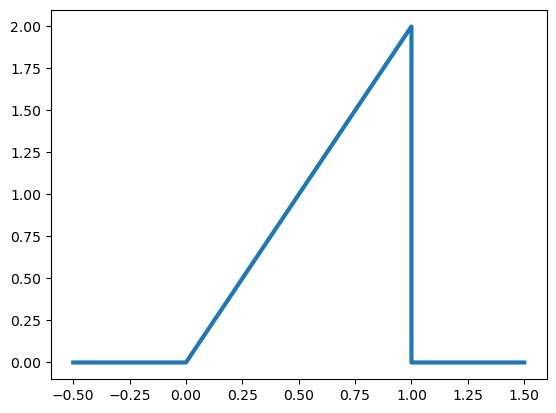

In [21]:
import matplotlib.pyplot as plt

x = [-0.5, 0, 1, 1, 1.5]
y = [0, 0, 2, 0, 0]

plt.plot(x, y, linewidth=3)

#### Ejemplo

¿Cuál es la probabilidad de que se atienda el 75% o menos de las llamadas?


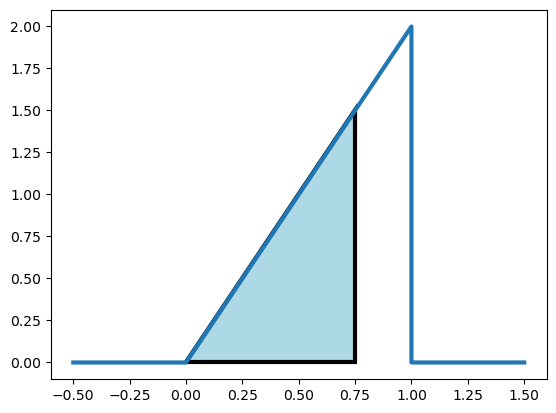

In [22]:
import matplotlib.pyplot as plt

# Datos para la línea
x = [-0.5, 0, 1, 1, 1.5]
y = [0, 0, 2, 0, 0]

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Dibujar la línea
ax.plot(x, y, linewidth=3)

# Dibujar el polígono
polygon_x = [0, 0.75, 0.75, 0]
polygon_y = [0, 0, 1.5, 0]
ax.fill(polygon_x, polygon_y, color="lightblue", linewidth=3, edgecolor="black")


In [23]:
from scipy.stats import beta

result_pbeta = beta.cdf(0.75, 2, 1)
print(1.5 * .75 / 2)
print(result_pbeta)

0.5625
0.5625


### Función de distribución acumulada

- La  **función de distribución acumulada** (CDF) de una v.a. $X$ se define como la función
$$
F(x) = P(X \leq x)
$$

-   Esta definición aplica indistintamente de si $X$ es discreta o continua.
-   La **función de supervivencia** de una v.a. $X$ es definida como

$$
S(x) = P(X > x)
$$
- Note que $S(x) = 1 - F(x)$
- Para v.a. continuas, la función de densidad es la derivada de la acumulada


#### Ejemplo

¿Cuál es la función de supervivencia y CDF de la densidad considerada antes?

Para $1 \geq x \geq 0$
$$
F(x) = P(X \leq x) = \frac{1}{2} Base \times Altura = \frac{1}{2} (x) \times (2 x) = x^2
$$

$$
S(x) = 1 - x^2
$$



In [24]:
print(beta.cdf([0.4, 0.5, 0.6], 2, 1))

[0.16 0.25 0.36]


### Función Cuantil

- La  **función cuantil** (QF) de una v.a. $X$ se define como la función
$$
Q(x) = F^{-1}(x)
$$

Es decir, la función cuantil es la inversa de la función de distribución acumulada.

### En Python

In [25]:
miFD = stats.norm(5,3)

In [26]:
miFD

In [27]:
x = np.linspace(-5,15,101)
y1 = miFD.pdf(x) # densidad
y2 = miFD.cdf(x) # acumulada
y3 = miFD.ppf(y2) # cuantil

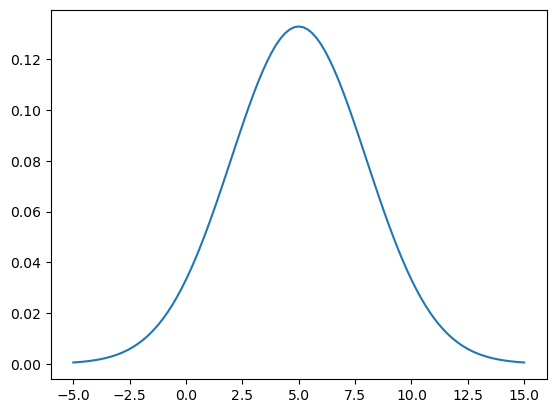

In [28]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(x,y1,'-');

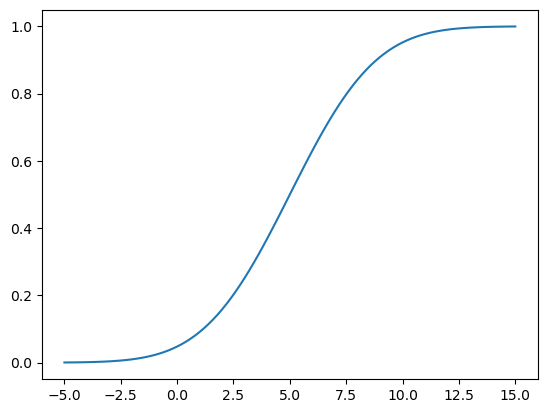

In [29]:
plt.figure()
plt.plot(x,y2,'-');

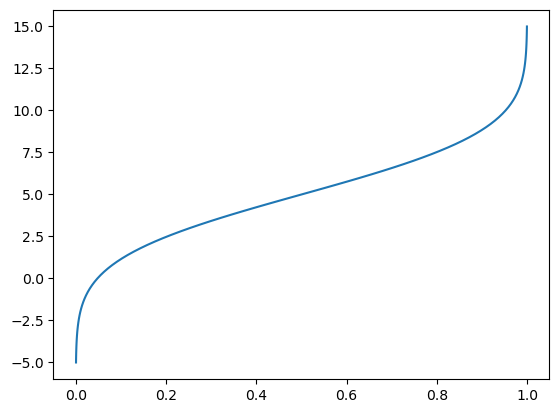

In [30]:
plt.figure()
x1 = np.linspace(0,1, len(y3))
plt.plot(y2,y3,'-');

Distribución acumulada empírica

In [31]:
x = stats.norm.rvs(loc=0,scale=1,size=1000) # distribucion normal estandar
x = np.sort(x) # odenamos los valores de la variable
n = x.size # tamano de la muestra
y = np.arange(1, n+1) / n # % acumulado

Text(0, 0.5, 'y')

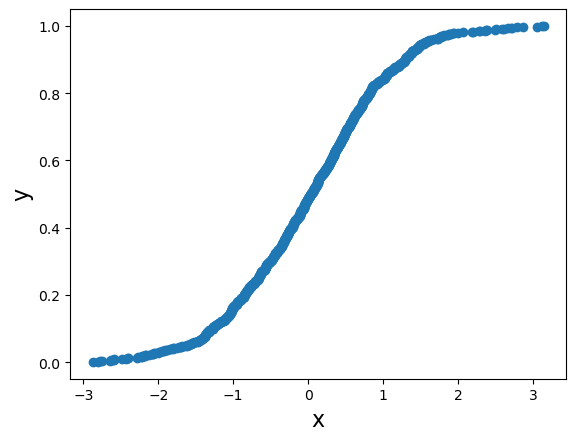

In [32]:
plt.figure()
plt.scatter(x=x, y=y);
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

In [33]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(x)

In [34]:
ecdf(1.5)

0.9440000000000001

**QQ plot**

In [35]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html#scipy.stats.probplot
nsample = 100
np.random.seed(7654321)

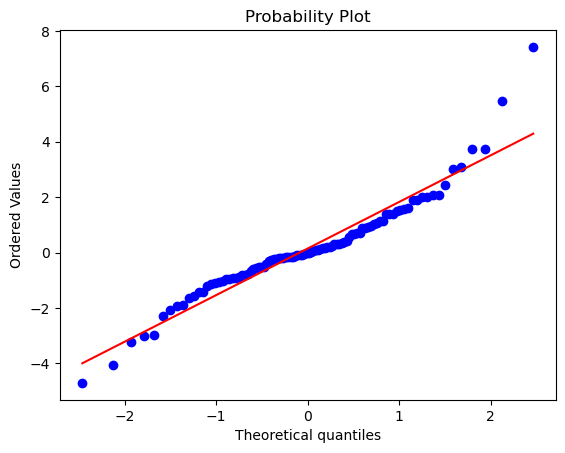

In [36]:
plt.figure()
x = stats.t.rvs(df=3, size=nsample)
res = stats.probplot(x, plot=plt)